# Comparison

Now that we have attained the four models trained on the training set, we now compare the performance of these models on the test set. First we import some necessary libraries.

In [1]:
import os
import pandas as pd
import random
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

Each model has a list of predictions for the test set where they give their respective probabilities of a case having heart disease based on given information for the other features. We read each list of probabilities in and store them in an array.

In [2]:
url='https://drive.google.com/file/d/1oSwxgERDxrEQKoUGj5a-onQoodnVLEbO/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
LR_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1Nj2U2jn4m8l_1kHobQkEWmYJEDPRFwhr/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
BDT_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1XnP_YbaQIna-2FarDxSLman2niQP30nC/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
KNN_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1DNsZAqzjk-5mEDaOGY2wK9t0vlZxSnPb/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
lin_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1Gfq07W8nsKJchehPPIm5hYHDOTKbSqDu/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
pres_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1IGdBM6G27ylOwM1vOolY_oVePyqYDOMU/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
NM_df = pd.read_csv(url)

url='https://drive.google.com/file/d/1qkbZ7ZctdRZXez9FPPHNavVRfXGD8PSf/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
test_df = pd.read_csv(url)

In [3]:
LR = LR_df['Probabilities']
BDT = BDT_df['Probability of Heart Disease']
KNN = KNN_df['0']
lin = lin_df['Probabilities']
pres = pres_df['0']
NM = NM_df['Probability of Heart Disease']

test = test_df['HeartDiseaseorAttack']

## Producing Curves

We now take the probabilities produced by the models and produce three types of curve based on these values and the true values stored in "test". The types of curve will be ROC curves, precision-recall curves and recall-threshold curves.

Here, we generate the points for the ROC curves using the "roc_curve" function in the sk-learn "metrics" package and we generate the points for the precision-recall and recall-threshold curves using the "precision_recall_curve" function in the sk-learn "metrics".

In [4]:
from sklearn.metrics import roc_curve
LR_fpr, LR_tpr, _ = roc_curve(test, LR)
BDT_fpr, BDT_tpr, _ = roc_curve(test, BDT)
KNN_fpr, KNN_tpr, _ = roc_curve(test, KNN)
lin_fpr, lin_tpr, _ = roc_curve(test, lin)
pres_fpr, pres_tpr, _ = roc_curve(test, pres)
NM_fpr, NM_tpr, _ = roc_curve(test, NM)

In [5]:
from sklearn.metrics import precision_recall_curve
LR_pre, LR_rec, LR_thr = precision_recall_curve(test, LR)
BDT_pre, BDT_rec, BDT_thr = precision_recall_curve(test, BDT)
KNN_pre, KNN_rec, KNN_thr = precision_recall_curve(test, KNN)
lin_pre, lin_rec, lin_thr = precision_recall_curve(test, lin)
pres_pre, pres_rec, pres_thr = precision_recall_curve(test, pres)
NM_pre, NM_rec, NM_thr = precision_recall_curve(test, NM)

### KNN and Boosted Decision Tree Comparisons

The KNN and Boosted Decision Tree models each have two different models. KNN has an equal model where the model was trained off half positive, half negative data and a preserved model where the model was trained off the ratio of positive and negative cases in the dataset (10:90). The Boosted Decision Tree uses two models, the regular one and another trained off a dataset with no missing data at all.

We plot all 3 curves to compare the models, to see which to use in the final comparison.

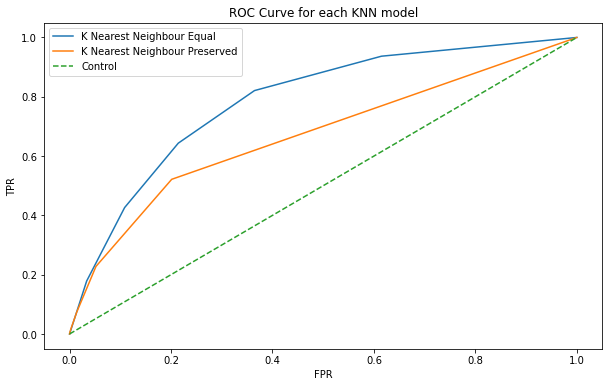

In [6]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(KNN_fpr, KNN_tpr, label='K Nearest Neighbour Equal')
plt.plot(pres_fpr, pres_tpr, label='K Nearest Neighbour Preserved')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each KNN model')
plt.legend()
plt.show()

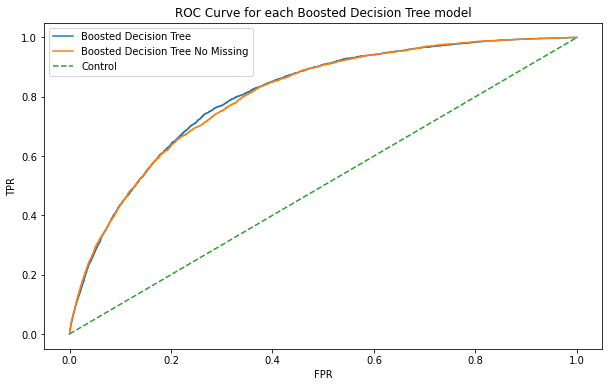

In [7]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(BDT_fpr, BDT_tpr, label='Boosted Decision Tree')
plt.plot(NM_fpr, NM_tpr, label='Boosted Decision Tree No Missing')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each Boosted Decision Tree model')
plt.legend()
plt.show()

We look at the AUC (Area Under the Curve) score for each curve to get a numerical answer to which model performed the best, after having made our visual observations. We can say that the larger the AUC, the better the model predictions.

In [8]:
from sklearn.metrics import roc_auc_score
print("AUC Scores:")
print("KNN Equal: " + str(roc_auc_score(test, KNN)))
print("KNN Preserved: " + str(roc_auc_score(test, pres)))
print("Boosted Decision Tree: " + str(roc_auc_score(test, BDT)))
print("BDT No Missing: " + str(roc_auc_score(test, NM)))

AUC Scores:
KNN Equal: 0.7851794239506134
KNN Preserved: 0.6698199950801929
Boosted Decision Tree: 0.8057904028769552
BDT No Missing: 0.8036307706102066


Here we can conclude that for KNN, the equal model performs better, whereas it is roughly equal for the BDT models.

Now we check the Precision-Recall and Recall-Threshold curves.

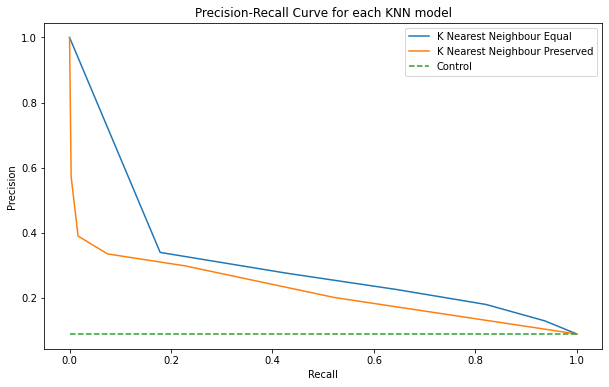

In [9]:
control_val = test.value_counts()[1] / len(test)
x=[0,1]
y=[control_val, control_val]
plt.figure(figsize=(10,6))
plt.plot(KNN_rec, KNN_pre, label='K Nearest Neighbour Equal')
plt.plot(pres_rec, pres_pre, label='K Nearest Neighbour Preserved')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each KNN model')
plt.legend()
plt.show()

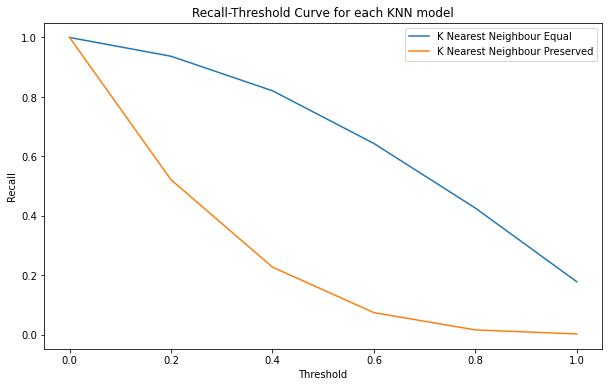

In [10]:
plt.figure(figsize=(10,6))
plt.plot(KNN_thr, KNN_rec[0:len(KNN_rec)-1], label='K Nearest Neighbour Equal')
plt.plot(pres_thr, pres_rec[0:len(pres_rec)-1], label='K Nearest Neighbour Preserved')

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall-Threshold Curve for each KNN model')
plt.legend()
#plt.axis([0.98,1,0.08,0.12])
plt.show()

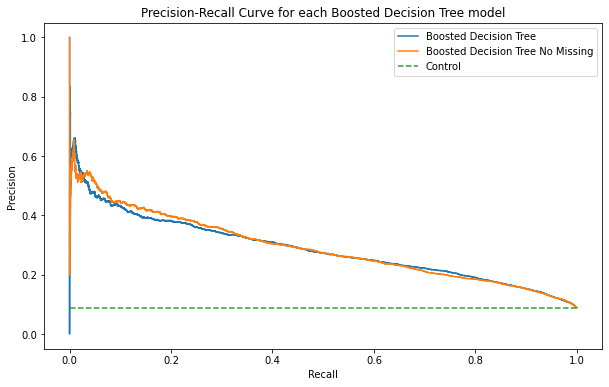

In [11]:
control_val = test.value_counts()[1] / len(test)
x=[0,1]
y=[control_val, control_val]
plt.figure(figsize=(10,6))
plt.plot(BDT_rec, BDT_pre, label='Boosted Decision Tree')
plt.plot(NM_rec, NM_pre, label='Boosted Decision Tree No Missing')


plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each Boosted Decision Tree model')
plt.legend()
plt.show()

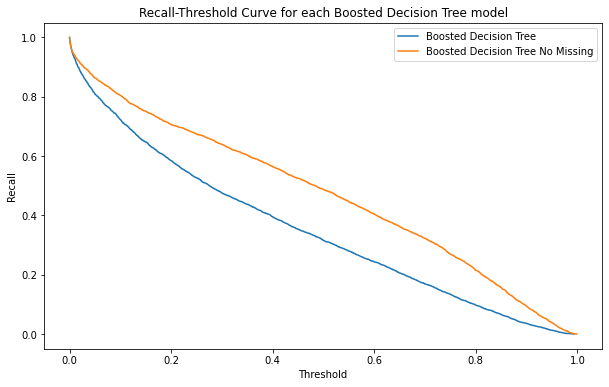

In [12]:
plt.figure(figsize=(10,6))
plt.plot(BDT_thr, BDT_rec[0:len(BDT_rec)-1], label='Boosted Decision Tree')
plt.plot(NM_thr, NM_rec[0:len(NM_rec)-1], label='Boosted Decision Tree No Missing')

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall-Threshold Curve for each Boosted Decision Tree model')
plt.legend()
#plt.axis([0.98,1,0.08,0.12])
plt.show()

The curves which are further into the upper-right corner perform better (this entails high precision even with high recall and high recall even with a high threshold). Therefore we choose the equal model for KNN and the no missing model for BDT.

### ROC (Receiver Operating Characteristic) Curve

ROC curves show how the true positive rate (TPR) and the false positive rate (FPR) change as the sensitivity rate is changed.

A perfect model would have 100% TPR and 0% FPR which corresponds with the curve lying in the upper-left corner of the graph. Therefore, the more a curve tends to the upper-left corner, the better the model predictions.

We now plot all of the ROC curves on the same graph. We also add a control curve which represents the performance of a truly random model (where both a positive and negative result are given a probability of 0.5).

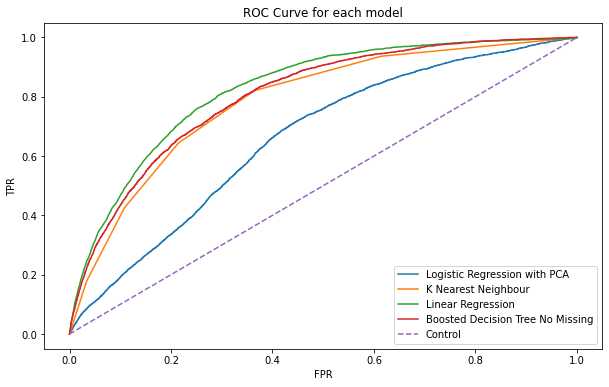

In [13]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
#plt.plot(BDT_fpr, BDT_tpr, label='Boosted Decision Tree')
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression with PCA')
plt.plot(KNN_fpr, KNN_tpr, label='K Nearest Neighbour')
plt.plot(lin_fpr, lin_tpr, label='Linear Regression')
plt.plot(NM_fpr, NM_tpr, label='Boosted Decision Tree No Missing')
#plt.plot(pres_fpr, pres_tpr, label='K Nearest Neighbour Preserved')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
#plt.axis([0.6,1,0.9,1])
plt.legend()
plt.show()

We can visually see that all of the models have performed better than the control, with 3 of the models (boosted decision tree, K nearest neighbour and linear regression) performing similarly and the logistic regression with PCA model following closely behind.

The AUC scores give the following:

In [14]:
from sklearn.metrics import roc_auc_score
print("AUC Scores:")
print("Linear Regression: " + str(roc_auc_score(test, lin)))
print("Boosted Decision Tree: " + str(roc_auc_score(test, BDT)))
print("K Nearest Neighbour: " + str(roc_auc_score(test, KNN)))
print("Logistic Regression with PCA: " + str(roc_auc_score(test, LR)))

AUC Scores:
Linear Regression: 0.8261057507747035
Boosted Decision Tree: 0.8057904028769552
K Nearest Neighbour: 0.7851794239506134
Logistic Regression with PCA: 0.6604129668170541


Therefore, linear regression has performed the best, closely followed by the boosted decision tree and K nearest neighbour models, with the logistic regression with PCA model having the lowest AUC score.

### Precision-Recall Curve

As explained on the following page: [Precision and Recall](https://towardsdatascience.com/precision-and-recall-88a3776c8007), precision is given by $\frac{TP}{(TP+FP)}$ and recall is given by $\frac{TP}{(TP+FN)}$ (T = True, F = False, P = Positive, N = Negative).

We note that the best model would be in the upper-right corner, so a model that tends towards the upper-right corner is determined to be the best for a precision-recall curve.

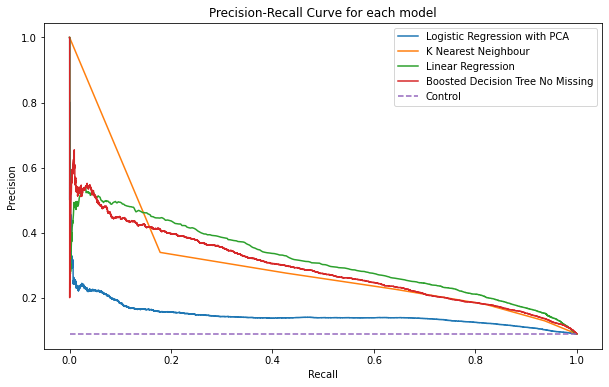

In [21]:
control_val = test.value_counts()[1] / len(test)
x=[0,1]
y=[control_val, control_val]
plt.figure(figsize=(10,6))
#plt.plot(BDT_rec, BDT_pre, label='Boosted Decision Tree')
plt.plot(LR_rec, LR_pre, label='Logistic Regression with PCA')
plt.plot(KNN_rec, KNN_pre, label='K Nearest Neighbour')
#plt.plot(pres_rec, pres_pre, label='K Nearest Neighbour Preserved')
plt.plot(lin_rec, lin_pre, label='Linear Regression')
plt.plot(NM_rec, NM_pre, label='Boosted Decision Tree No Missing')

plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each model')
plt.legend()
#plt.axis([0.98,1,0.08,0.12])
plt.show()

Here, we have linear regression performing best, followed by the boosted decision tree, then KNN and then logistic regression with PCA.

### Recall-Threshold Curve

Similarly here, the best model is the model that tends towards the upper-right corner (high recall despite a high threshold).

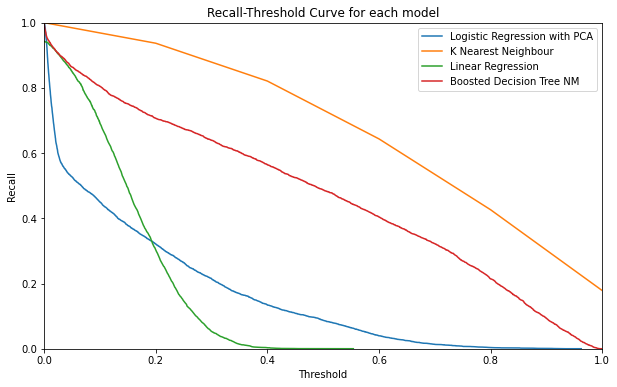

In [22]:
plt.figure(figsize=(10,6))
#plt.plot(BDT_thr, BDT_rec[0:len(BDT_rec)-1], label='Boosted Decision Tree')
plt.plot(LR_thr, LR_rec[0:len(LR_rec)-1], label='Logistic Regression with PCA')
plt.plot(KNN_thr, KNN_rec[0:len(KNN_rec)-1], label='K Nearest Neighbour')
plt.plot(lin_thr, lin_rec[0:len(lin_rec)-1], label='Linear Regression')
#plt.plot(pres_thr, pres_rec[0:len(pres_rec)-1], label='K Nearest Neighbour Preserved')
plt.plot(NM_thr, NM_rec[0:len(NM_rec)-1], label='Boosted Decision Tree No Missing')

plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall-Threshold Curve for each model')
plt.legend()
plt.axis([0,1,0,1])
#plt.axis([0,0.2,0.8,1])
plt.show()

KNN performs best here, followed by the boosted decision tree, with linear and logistic regressions performing worst.

## Evaluation

As we prioritise ROC curves and the recall-threshold curves, we note that KNN, the boosted decision tree and linear regression stand out. However, as linear regression performed so poorly on the recall-threshold curve, we are lead to select between KNN and the boosted decision tree as the "winner" for this problem, depending on how much weight is given to ROC and recall-threshold.

This will be expanded on in the Discussion section.